CHESS GAMES EDA
- This is a EDA of chess games dataset. This analysis gives info about rating of palyers, win rate, openings used & percentage of upsets.

Let's import all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

Downloading dataset from kaggle

In [3]:
od.download('https://www.kaggle.com/datasets/datasnaek/chess')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading chess.zip to .\chess


100%|██████████| 2.77M/2.77M [00:00<00:00, 3.10MB/s]

Reading the downlaoded csv into pandas dataframe

In [4]:
chess_file = './chess/games.csv'
df = pd.read_csv(chess_file)

In [4]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [8]:
df = df[['id', 'rated', #'created_at', 'last_move_at', 
    'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']].copy()

Overview of the result of these games

Text(0, 0.5, 'Number of matches')

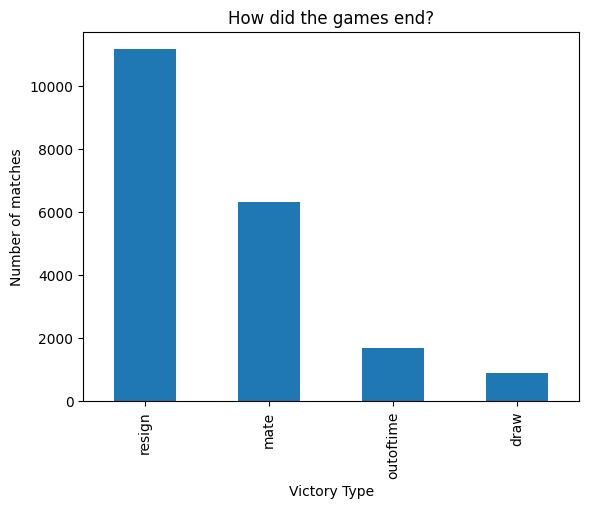

In [26]:
ax = df['victory_status'].value_counts().plot(kind = 'bar', title='How did the games end?')
ax.set_xlabel('Victory Type')
ax.set_ylabel('Number of matches')

Out of all the matches that weren't draw, how many were won by white and black respectively?

<Axes: title={'center': 'Distribution of wins for black and white'}, ylabel='count'>

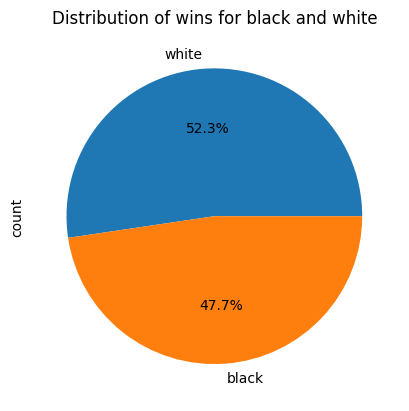

In [67]:
df_wins = df.query('victory_status != "draw" & winner != "draw"')
df_wins['winner'].value_counts().plot(kind='pie', title = 'Distribution of wins for black and white', autopct='%0.1f%%')

Now, let's see the wins for black and white for different types of wins

Opening analysis

Text(0, 0.5, 'Name of opening played')

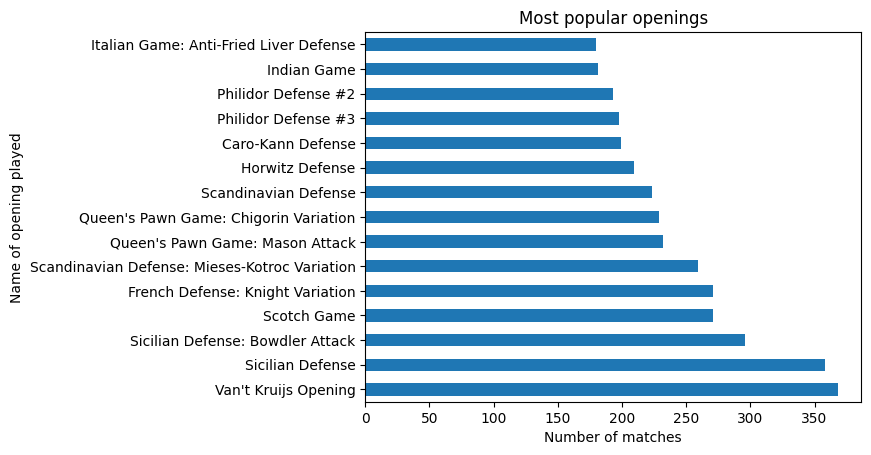

In [104]:
ax = df['opening_name'].value_counts().head(15).plot(kind='barh', title="Most popular openings")
ax.set_xlabel("Number of matches")
ax.set_ylabel("Name of opening played")

What openings were used by white to win maximum number of games?

Text(0, 0.5, 'Name of opening played')

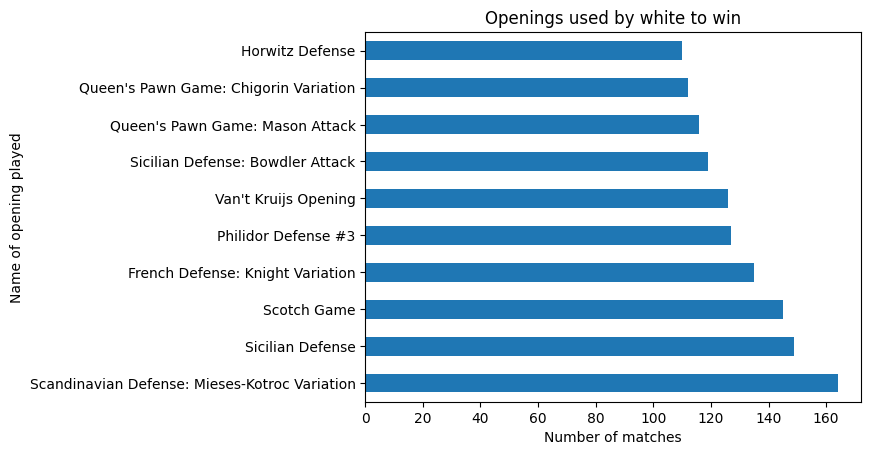

In [111]:
ax = df.query('winner == "white"')['opening_name'].value_counts().head(10).plot(kind='barh', title='Openings used by white to win')
ax.set_xlabel("Number of matches")
ax.set_ylabel("Name of opening played")

What openings were used by black to win maximum number of games?

Text(0, 0.5, 'Name of opening played')

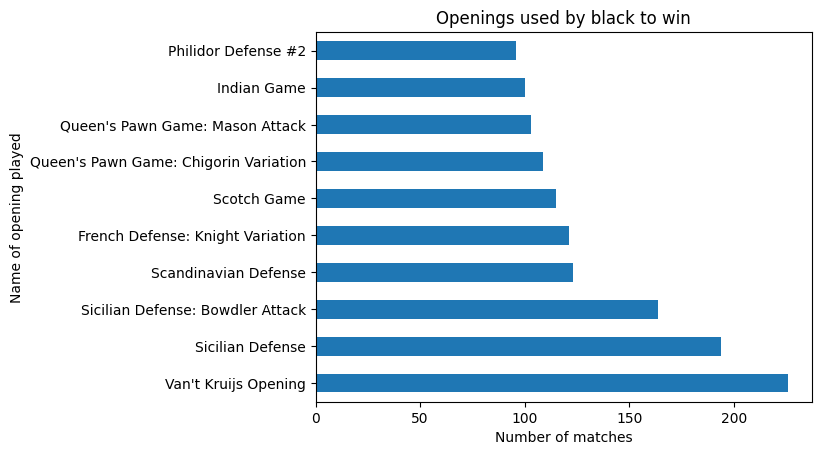

In [113]:
ax = df.query('winner == "black"')['opening_name'].value_counts().head(10).plot(kind='barh', title='Openings used by black to win')
ax.set_xlabel("Number of matches")
ax.set_ylabel("Name of opening played")

Total number of matches which were not upsets
i.e. higher rating player won the round

In [166]:
total = len(df.query('winner == "white" & white_rating > black_rating' )) + len(df.query('winner == "black" & black_rating > white_rating' ))
total_per = (total*100)/(df['id'].count())
total_prc = np.round(total_per,decimals=2)
print("Player with higher rating won in " + str(total) + " matches i.e. " + str(total_prc) + "% matches" )


Player with higher rating won in 12352 matches i.e. 61.58% matches


Now let's see what's the percentage win for the weaker player when there is a certain difference in the rating.


In [15]:
white_upsets = df[(df.winner == 'white') & (df.white_rating < df.black_rating)]
black_upsets = df[(df.winner == 'black') & (df.black_rating < df.white_rating)]
upsets = pd.concat([white_upsets, black_upsets])

In [17]:
initial_rating = 900
step = 50

u_percentages = []

print(f'Rating difference : Percentage of wins by weaker player')
for i in range(0+step, initial_rating, step):
    th_upsets = upsets[upsets.rating_diff > i]
    th_df = df[df.rating_diff > i]
    upsets_percentage = (th_upsets.shape[0] / th_df.shape[0]) * 100
    u_percentages.append([i, upsets_percentage])
    print(f'{str(i).ljust(18)}:  {upsets_percentage:.2f}%')

Rating difference : Percentage of wins by weaker player
50                :  28.40%
100               :  24.34%
150               :  20.98%
200               :  17.67%
250               :  15.65%
300               :  13.28%
350               :  11.59%
400               :  10.88%
450               :  10.73%
500               :  10.37%
550               :  9.60%
600               :  9.88%
650               :  8.75%
700               :  5.17%
750               :  4.59%
800               :  2.56%
850               :  2.38%


This data as graph can be viewed shown as given below.

Text(0, 0.5, 'upsets percentage')

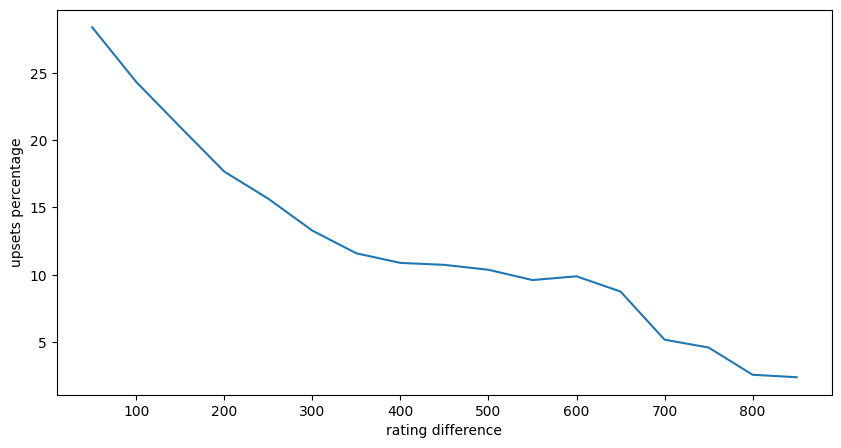

In [18]:
plt.figure(figsize=(10,5))
plt.plot(*zip(*u_percentages))
plt.xlabel('rating difference')
plt.ylabel('upsets percentage')

What's the distribution of number of moves in these games?

C:\Users\Dell\AppData\Local\Temp\ipykernel_8284\4001016530.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.turns,color='white')


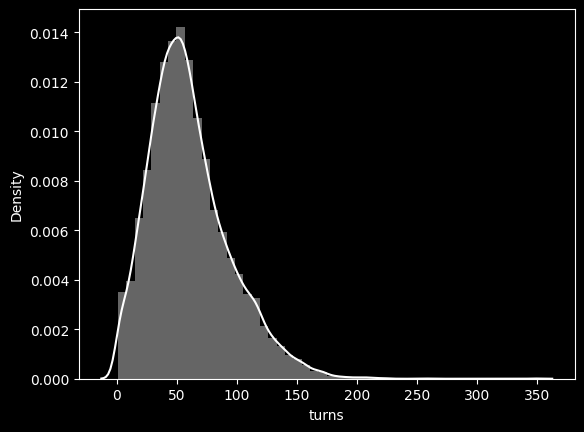

In [170]:
plt.style.use('dark_background')
sns.distplot(df.turns,color='white')
plt.show()

Distribution of ratings of players in the given dataset of games

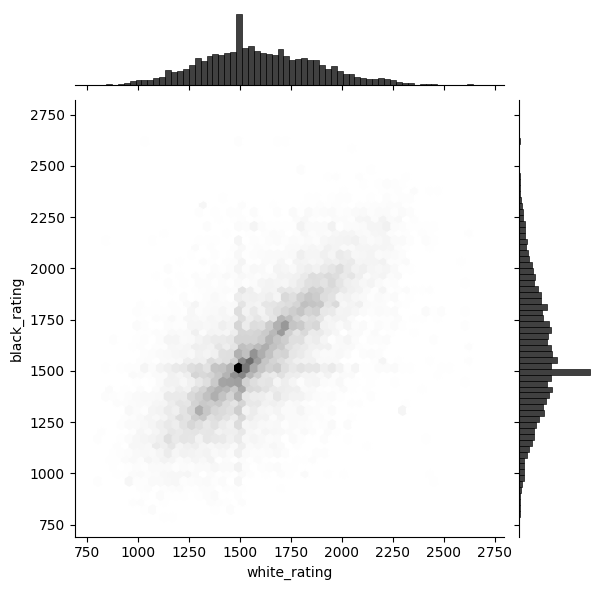

In [172]:
plt.style.use('default')
sns.jointplot(x='white_rating',y='black_rating',data=df,kind='hex',color='black')

Distribution of victory types in different elo rating brackets i.e. Under 1500, under 2000, above 2000

In [7]:
df = df[df.rated] #this only fetches the rated games
df['mean_rating'] = (df.white_rating+df.black_rating) / 2
df['rating_diff'] = abs(df.white_rating - df.black_rating)

In [177]:
under_1500 = df[df.mean_rating < 1500]
under_2000 = df[df.mean_rating < 2000]
over_2000 = df[df.mean_rating > 2000]

brackets = [under_1500, under_2000, over_2000]
bracket_titles = ['Under 1500', 'Under 2000', 'Over 2000']

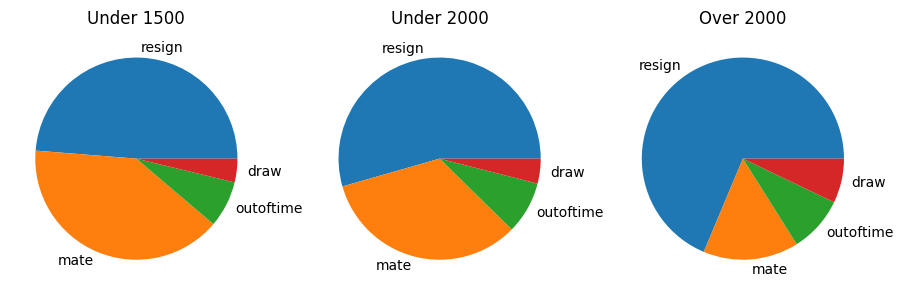

In [178]:
plt.figure(figsize=(15,11))
for i, bracket in enumerate(brackets):
    victory_status = bracket.victory_status.value_counts()
    plt.subplot(1, 4, i+1)
    plt.title(bracket_titles[i])
    plt.pie(victory_status, labels=victory_status.index)

Future Analysis that can be done.
- the moves column in this dataset can be used to acces the winning rate after the opening move. (e.g. winning rate after king's pawn, queen's pawn etc.)
- which opening is mostly used by players in different elo rating brackets.